In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import nltk
from tensorflow import keras
from tensorflow.keras import layers, models
from tqdm import tqdm

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


# EDA

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(35, 25))
fig.suptitle('Different feature distributions')

axes = axes.reshape(32,)

for i,column in enumerate(df.columns):
    kde_status = False
    axes[i].set_yscale('log')
    
    if column == "Time" or column == "Amount":
        kde_status = True
        
    sns.histplot(ax = axes[i],data = df, x= column,kde=kde_status)

# Data Cleaning

In [ ]:
df.isnull().sum()

In [ ]:
plot = sns.histplot(data = df , x = "Class")
plot.set(yscale="log")
print()

In [ ]:
from sklearn.utils import resample

df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=284315,    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.Class.value_counts()

# Model Preparation

In [ ]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler()

df_upsampled['Amount'] = transformer.fit_transform(df_upsampled['Amount'].values.reshape(-1,1))
df_upsampled['Time']   = transformer.fit_transform(df_upsampled['Time'].values.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_model = df_upsampled.sample(frac=1).reset_index(drop=True)

X = df_model.drop('Class', axis=1).values
y = df_model['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Model Fitting and Results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeClassifier

rfc = DecisionTreeClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test,lr_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(units = 32,kernel_initializer="uniform",activation="relu",input_shape = (30,)))
model.add(Dense(units = 64,kernel_initializer="uniform",activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 32,kernel_initializer="uniform",activation="relu"))
model.add(Dense(units = 1,kernel_initializer="uniform",activation="sigmoid"))
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['acc'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=64, epochs=20, verbose=1)

In [ ]:
df_history = pd.DataFrame(model.history.history)

In [ ]:
plt.figure()
df_history[['val_acc', 'acc']].plot()

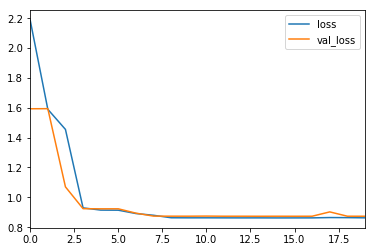

In [47]:
df_history[['loss', 'val_loss']].plot()